In [4]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings("ignore")

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import geomstats.backend as gs
import geomstats.datasets.utils as data_utils
from geomstats.geometry.pre_shape import KendallShapeMetric, PreShapeSpace
from geomstats.visualization import KendallDisk, KendallSphere

INFO: Using numpy backend
INFO: NumExpr defaulting to 4 threads.


## Generate N triangles (3-tuples), each one drawn i.i.d. from a multivariate normal distribution

In [6]:
import numpy as np

def random_gaussian_kendall_shapes(m,k,means,cov,N):
   
    shapes = []

    for i in range(N):
        shape = []
        for j in range(k):
            R = np.random.multivariate_normal(means[j],cov)
            shape.append(R)
        shapes.append(shape)

    shapes = np.array(shapes)
    
    return shapes

In [91]:
m = 2  # number of spatial dimensions
k = 3  # number of landmarks

N = 1000  # number of randomly drawn k-tuples 

var = 0.001
cov_eq = var*np.diag([1,1]) # isotropic covariance matrix

cov_eq = np.mat([[1,0],[0,1]])


## specify covariance matrix & mean values of x-y coordinates for each landmark


## Equilateral mean triangle:
means_eq = [(0,0),(-1,np.sqrt(3)),(-2,0)]
cov_eq = 10*var*np.diag([1,1])     # isotropic covariance matrix

triangles_eq = random_gaussian_kendall_shapes(m,k,means_eq,cov_eq,N)

## 30-60-90 mean triangle:

means30_60_90 = [(0,-1),(1,np.sqrt(3)-1),(1,-1)]
cov_30_60_90 = var*np.diag([1,1])

triangles_30_60_90 = random_gaussian_kendall_shapes(m,k,means30_60_90,cov_30_60_90,N)


### Plot triangle vertices in 2D plane 

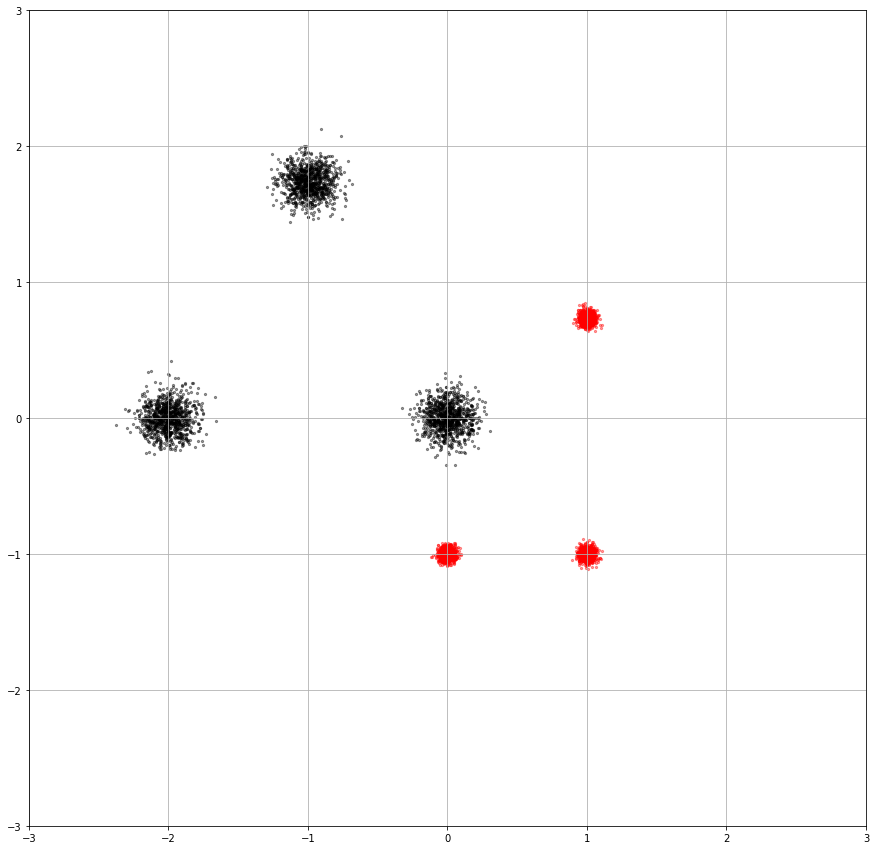

In [92]:
fig2 = plt.figure(figsize=(15,15))

xs = []
ys = []

for i in range(N):
    for j in range(3):
        xs.append(triangles_eq[i][j][0])
        ys.append(triangles_eq[i][j][1])
    

plt.scatter(xs,ys,s=5,color="black",alpha=0.4)

plt.xlim(-3,3)
plt.ylim(-3,3)

xs = []
ys = []

for i in range(N):
    for j in range(3):
        xs.append(triangles_30_60_90[i][j][0])
        ys.append(triangles_30_60_90[i][j][1])

plt.grid()
plt.scatter(xs,ys,s=5,color="red",alpha=0.4)

### Plot triangles as points in Kendall Sphere

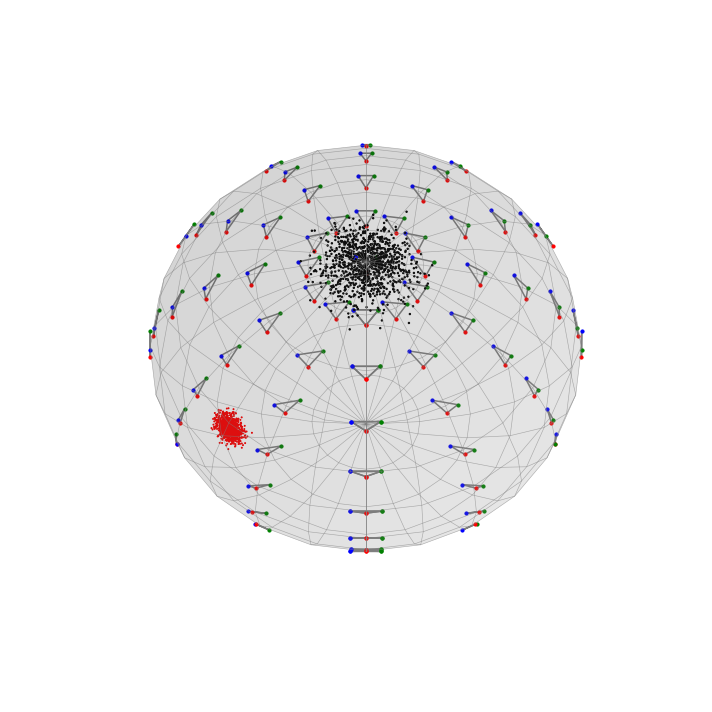

In [93]:
S = KendallSphere(point_type = "extrinsic")

fig = plt.figure(figsize=(10, 10))
S.draw()

S.clear_points()
S.add_points(triangles_eq)
S.draw_points(color="k", s=2)

S.clear_points()
S.add_points(triangles_30_60_90)
S.draw_points(color="r",s=1)